In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/globalterrorismdb_0718dist.csv',encoding='latin1',low_memory=False)


## Understanding Dataset and data exploration

In [ ]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
data.shape

(181691, 135)

In [ ]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

In [ ]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

**Country and region with more terrorist attacks**

In [ ]:
data['country_txt'].value_counts().idxmax()

'Iraq'

No of Unique Countries

In [ ]:
data['country_txt'].nunique()

205

Region with more number of terrorist attacks

In [ ]:
data['region_txt'].value_counts().idxmax()

'Middle East & North Africa'

Regions

In [ ]:
data['region_txt'].unique()

array(['Central America & Caribbean', 'North America', 'Southeast Asia',
       'Western Europe', 'East Asia', 'South America', 'Eastern Europe',
       'Sub-Saharan Africa', 'Middle East & North Africa',
       'Australasia & Oceania', 'South Asia', 'Central Asia'],
      dtype=object)

In [ ]:
data['region_txt'].nunique()

12

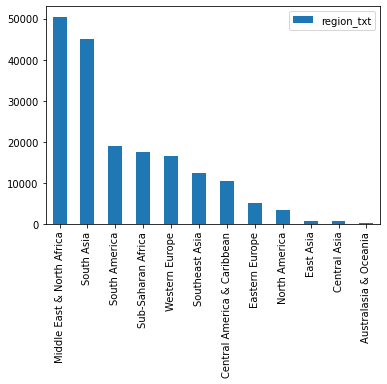

In [ ]:
data['region_txt'].value_counts().plot(kind='bar',legend='Region count')

City with most attacks (Baghdad(Capital of Iraq))

In [ ]:
data['city'].value_counts()

Unknown          9775
Baghdad          7589
Karachi          2652
Lima             2359
Mosul            2265
                 ... 
Cano Colorado       1
Lucan               1
Buyengero           1
Bama Khela          1
Wawouli             1
Name: city, Length: 36674, dtype: int64

Year with more attacks

In [ ]:
data['iyear'].value_counts().idxmax()


2014

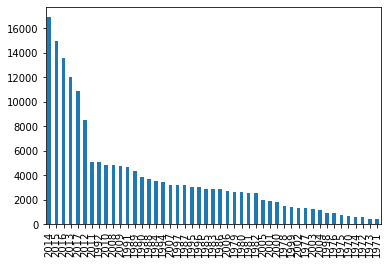

In [ ]:
data['iyear'].value_counts().plot(kind='bar')

Types of attacks

In [ ]:
data['attacktype1_txt'].unique()

array(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

In [ ]:
data['attacktype1_txt'].nunique()

9

In [ ]:
data['attacktype1_txt'].value_counts().idxmax()

'Bombing/Explosion'

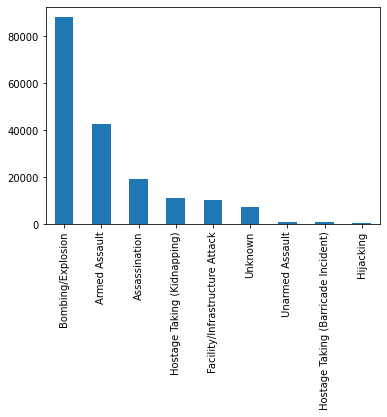

In [ ]:
data['attacktype1_txt'].value_counts().plot(kind='bar')

No of suicide attacks (6633)

In [ ]:
data['suicide'].value_counts()

0    175058
1      6633
Name: suicide, dtype: int64

Terrorist Groups

In [ ]:
data.gname.nunique()

3537

In [ ]:
data['gname'].value_counts()

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
                                                    ...  
Union of Peaceful Citizens of Algeria                   1
Falangist Vanguard                                      1
Manatari Brotherhood                                    1
Dignity Command                                         1
Radical Communist Armed Nucleus                         1
Name: gname, Length: 3537, dtype: int64

In [ ]:
data.vicinity

0         0
1         0
2         0
3         0
4         0
         ..
181686    0
181687    1
181688    0
181689    0
181690    0
Name: vicinity, Length: 181691, dtype: int64

Target

In [ ]:
data.targsubtype1_txt.nunique()

112

In [ ]:
data.targtype1_txt.unique()

array(['Private Citizens & Property', 'Government (Diplomatic)',
       'Journalists & Media', 'Police', 'Utilities', 'Military',
       'Government (General)', 'Airports & Aircraft', 'Business',
       'Educational Institution', 'Violent Political Party',
       'Religious Figures/Institutions', 'Unknown', 'Transportation',
       'Tourists', 'NGO', 'Telecommunication', 'Food or Water Supply',
       'Terrorists/Non-State Militia', 'Other', 'Maritime',
       'Abortion Related'], dtype=object)

In [ ]:
data.targtype1_txt.nunique()

22

**Number of Kills vs Year**

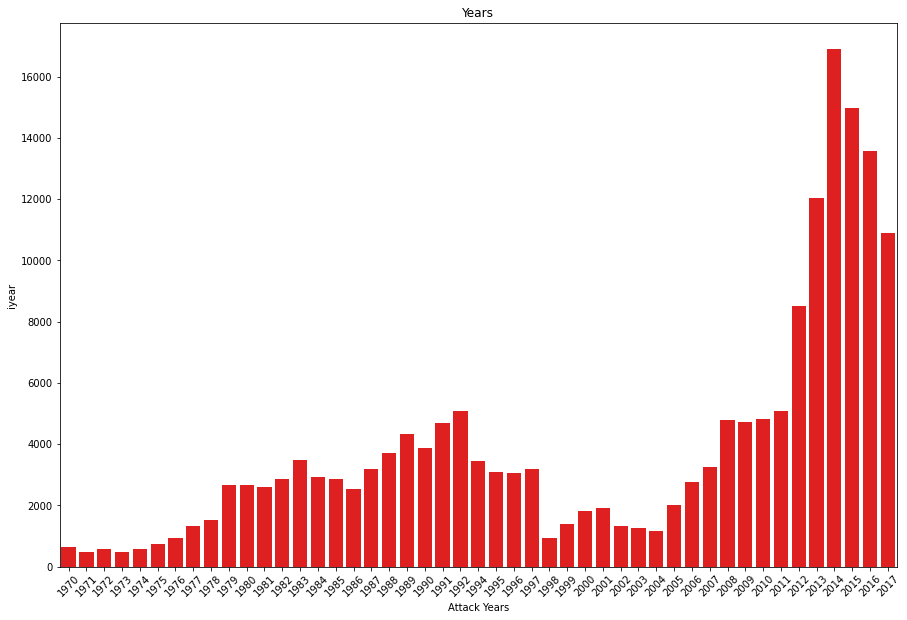

In [ ]:
x_year = data['iyear'].unique()
y_year = data['iyear'].value_counts().sort_index()
plt.figure(figsize=(15,10))
plt.title("Years")
plt.xlabel("Attack Years")
plt.ylabel("Number of attacks each year")
plt.xticks(rotation=45)
sns.barplot(x=x_year, y=y_year,color='red')
plt.show()

Weapons vs Success

In [ ]:
data.weaptype1_txt.nunique()

12

In [ ]:
data['weaptype1_txt'].unique()

array(['Unknown', 'Explosives', 'Incendiary', 'Firearms', 'Chemical',
       'Melee', 'Sabotage Equipment',
       'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
       'Fake Weapons', 'Radiological', 'Other', 'Biological'],
      dtype=object)

In [ ]:
data['weaptype1_txt'].value_counts()

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

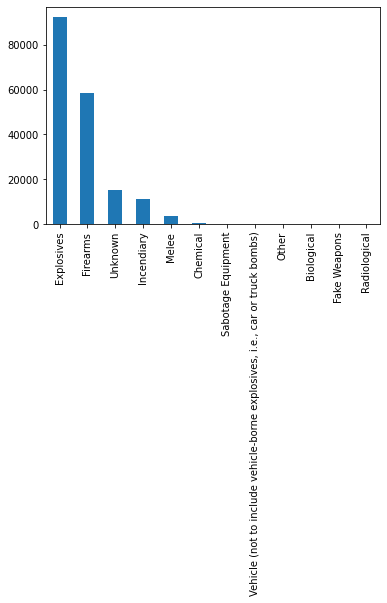

In [ ]:
data['weaptype1_txt'].value_counts().plot(kind='bar')

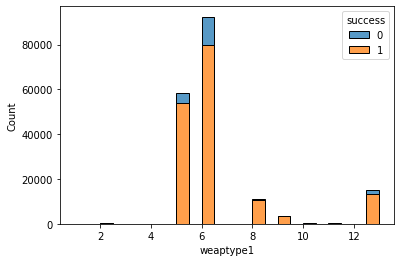

In [ ]:
sns.histplot(binwidth=0.5, x="weaptype1", hue="success", data=data, stat="count", multiple="stack")

In [ ]:
data.success.value_counts()

1    161632
0     20059
Name: success, dtype: int64

## **Feature Engineering**

**Selecting only useful columns**

In [ ]:
data= data[['iyear', 'imonth','gname', 'iday','extended', 'provstate', 'latitude', 'longitude', 'specificity',
            'vicinity', 'crit1', 'crit2', 'crit3', 'doubtterr', 'multiple', 'natlty1',  'propextent',
            'ishostkid', 'ransom', 'country',  'city', 'individual', 'nkillus', 'nkillter', 'nwound',
            'nwoundus', 'nwoundte', 'property', 'targtype1', 'suicide', 'success', 'weaptype1', 'region', 'attacktype1']]

In [ ]:
data.shape

(181691, 34)

In [ ]:
data.head()

,iyear,imonth,gname,iday,extended,provstate,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,natlty1,propextent,ishostkid,ransom,country,city,individual,nkillus,nkillter,nwound,nwoundus,nwoundte,property,targtype1,suicide,success,weaptype1,region,attacktype1
0,1970,7,1907,2,0,-1,18.456792,-69.951164,1.0,0,1,1,1,0.0,0.0,58.0,23.498343,0.0,0.0,58,29806,0,23.498343,23.498343,0.000000,23.498343,23.498343,0,14,0,1,13,2,1
1,1970,0,13,0,0,782,19.371887,-99.086624,1.0,0,1,1,1,0.0,0.0,21.0,23.498343,1.0,1.0,130,22166,0,23.498343,23.498343,0.000000,23.498343,23.498343,0,7,0,1,13,1,6
2,1970,1,3408,0,0,2497,15.478598,120.599741,4.0,0,1,1,1,0.0,0.0,217.0,23.498343,0.0,0.0,160,34517,0,23.498343,23.498343,0.000000,23.498343,23.498343,0,10,0,1,13,5,1
3,1970,1,3408,0,0,184,37.997490,23.762728,1.0,0,1,1,1,0.0,0.0,217.0,23.498343,0.0,0.0,78,2513,0,23.498343,23.498343,23.498343,23.498343,23.498343,1,7,0,1,6,8,3
4,1970,1,3408,0,0,808,33.580412,130.396361,1.0,0,1,1,1,-9.0,0.0,217.0,23.498343,0.0,0.0,101,11264,0,23.498343,23.498343,23.498343,23.498343,23.498343,1,7,0,1,8,4,7


Sum of missing values of all columns

In [ ]:
data.isna().sum()

iyear               0
imonth              0
gname               0
iday                0
extended            0
provstate         421
latitude         4556
longitude        4557
specificity         6
vicinity            0
crit1               0
crit2               0
crit3               0
doubtterr           1
multiple            1
natlty1          1559
propextent     117626
ishostkid         178
ransom         104310
country             0
city              434
individual          0
nkillus         64446
nkillter        66958
nwound          16311
nwoundus        64702
nwoundte        69143
property            0
targtype1           0
suicide             0
success             0
weaptype1           0
region              0
attacktype1         0
dtype: int64

In [ ]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 34 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   iyear        181691 non-null  int64  
 1   imonth       181691 non-null  int64  
 2   gname        181691 non-null  object 
 3   iday         181691 non-null  int64  
 4   extended     181691 non-null  int64  
 5   provstate    181270 non-null  object 
 6   latitude     177135 non-null  float64
 7   longitude    177134 non-null  float64
 8   specificity  181685 non-null  float64
 9   vicinity     181691 non-null  int64  
 10  crit1        181691 non-null  int64  
 11  crit2        181691 non-null  int64  
 12  crit3        181691 non-null  int64  
 13  doubtterr    181690 non-null  float64
 14  multiple     181690 non-null  float64
 15  natlty1      180132 non-null  float64
 16  propextent   64065 non-null   float64
 17  ishostkid    181513 non-null  float64
 18  ransom       77381 non-n

Encoding all the categorical values

In [ ]:
for col_name in data.columns:
    if(data[col_name].dtype == 'object'):
        data[col_name]= data[col_name].astype('category')
        data[col_name] = data[col_name].cat.codes

In [ ]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 34 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   iyear        181691 non-null  int64  
 1   imonth       181691 non-null  int64  
 2   gname        181691 non-null  int16  
 3   iday         181691 non-null  int64  
 4   extended     181691 non-null  int64  
 5   provstate    181691 non-null  int16  
 6   latitude     177135 non-null  float64
 7   longitude    177134 non-null  float64
 8   specificity  181685 non-null  float64
 9   vicinity     181691 non-null  int64  
 10  crit1        181691 non-null  int64  
 11  crit2        181691 non-null  int64  
 12  crit3        181691 non-null  int64  
 13  doubtterr    181690 non-null  float64
 14  multiple     181690 non-null  float64
 15  natlty1      180132 non-null  float64
 16  propextent   64065 non-null   float64
 17  ishostkid    181513 non-null  float64
 18  ransom       77381 non-n

Handing Missing Values

In [ ]:
data.isna().sum()

iyear               0
imonth              0
gname               0
iday                0
extended            0
provstate           0
latitude         4556
longitude        4557
specificity         6
vicinity            0
crit1               0
crit2               0
crit3               0
doubtterr           1
multiple            1
natlty1          1559
propextent     117626
ishostkid         178
ransom         104310
country             0
city                0
individual          0
nkillus         64446
nkillter        66958
nwound          16311
nwoundus        64702
nwoundte        69143
property            0
targtype1           0
suicide             0
success             0
weaptype1           0
region              0
attacktype1         0
dtype: int64

In [ ]:
data.fillna(data['propextent'].value_counts().index[0])

,iyear,imonth,gname,iday,extended,provstate,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,natlty1,propextent,ishostkid,ransom,country,city,individual,nkillus,nkillter,nwound,nwoundus,nwoundte,property,targtype1,suicide,success,weaptype1,region,attacktype1
0,1970,7,1907,2,0,-1,18.456792,-69.951164,1.0,0,1,1,1,0.0,0.0,58.0,3.0,0.0,0.0,58,29806,0,3.0,3.0,0.0,3.0,3.0,0,14,0,1,13,2,1
1,1970,0,13,0,0,782,19.371887,-99.086624,1.0,0,1,1,1,0.0,0.0,21.0,3.0,1.0,1.0,130,22166,0,3.0,3.0,0.0,3.0,3.0,0,7,0,1,13,1,6
2,1970,1,3408,0,0,2497,15.478598,120.599741,4.0,0,1,1,1,0.0,0.0,217.0,3.0,0.0,0.0,160,34517,0,3.0,3.0,0.0,3.0,3.0,0,10,0,1,13,5,1
3,1970,1,3408,0,0,184,37.997490,23.762728,1.0,0,1,1,1,0.0,0.0,217.0,3.0,0.0,0.0,78,2513,0,3.0,3.0,3.0,3.0,3.0,1,7,0,1,6,8,3
4,1970,1,3408,0,0,808,33.580412,130.396361,1.0,0,1,1,1,-9.0,0.0,217.0,3.0,0.0,0.0,101,11264,0,3.0,3.0,3.0,3.0,3.0,1,7,0,1,8,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,177,31,0,1601,2.359673,45.385034,2.0,0,1,1,0,1.0,0.0,182.0,3.0,0.0,3.0,182,6849,0,0.0,0.0,2.0,0.0,0.0,-9,4,0,1,5,11,2
181687,2017,12,2138,31,0,1371,35.407278,35.942679,1.0,1,1,1,0,1.0,0.0,167.0,4.0,0.0,3.0,200,14575,0,0.0,0.0,7.0,0.0,0.0,1,4,0,1,6,10,3
181688,2017,12,601,31,0,1479,6.900742,124.437908,2.0,0,1,1,1,0.0,0.0,160.0,4.0,0.0,3.0,160,18159,0,0.0,0.0,0.0,0.0,0.0,1,14,0,1,8,5,7
181689,2017,12,3408,31,0,1510,24.798346,93.940430,1.0,0,1,1,1,0.0,0.0,92.0,3.0,0.0,3.0,92,14206,0,0.0,0.0,0.0,0.0,0.0,-9,2,0,0,6,6,3


In [ ]:
data.fillna(data['latitude'].mean(),inplace=True)

In [ ]:
data.fillna(data['longitude'].mean(),inplace=True)

In [ ]:
data.isna().sum()

iyear          0
imonth         0
gname          0
iday           0
extended       0
provstate      0
latitude       0
longitude      0
specificity    0
vicinity       0
crit1          0
crit2          0
crit3          0
doubtterr      0
multiple       0
natlty1        0
propextent     0
ishostkid      0
ransom         0
country        0
city           0
individual     0
nkillus        0
nkillter       0
nwound         0
nwoundus       0
nwoundte       0
property       0
targtype1      0
suicide        0
success        0
weaptype1      0
region         0
attacktype1    0
dtype: int64

Correlation Plot

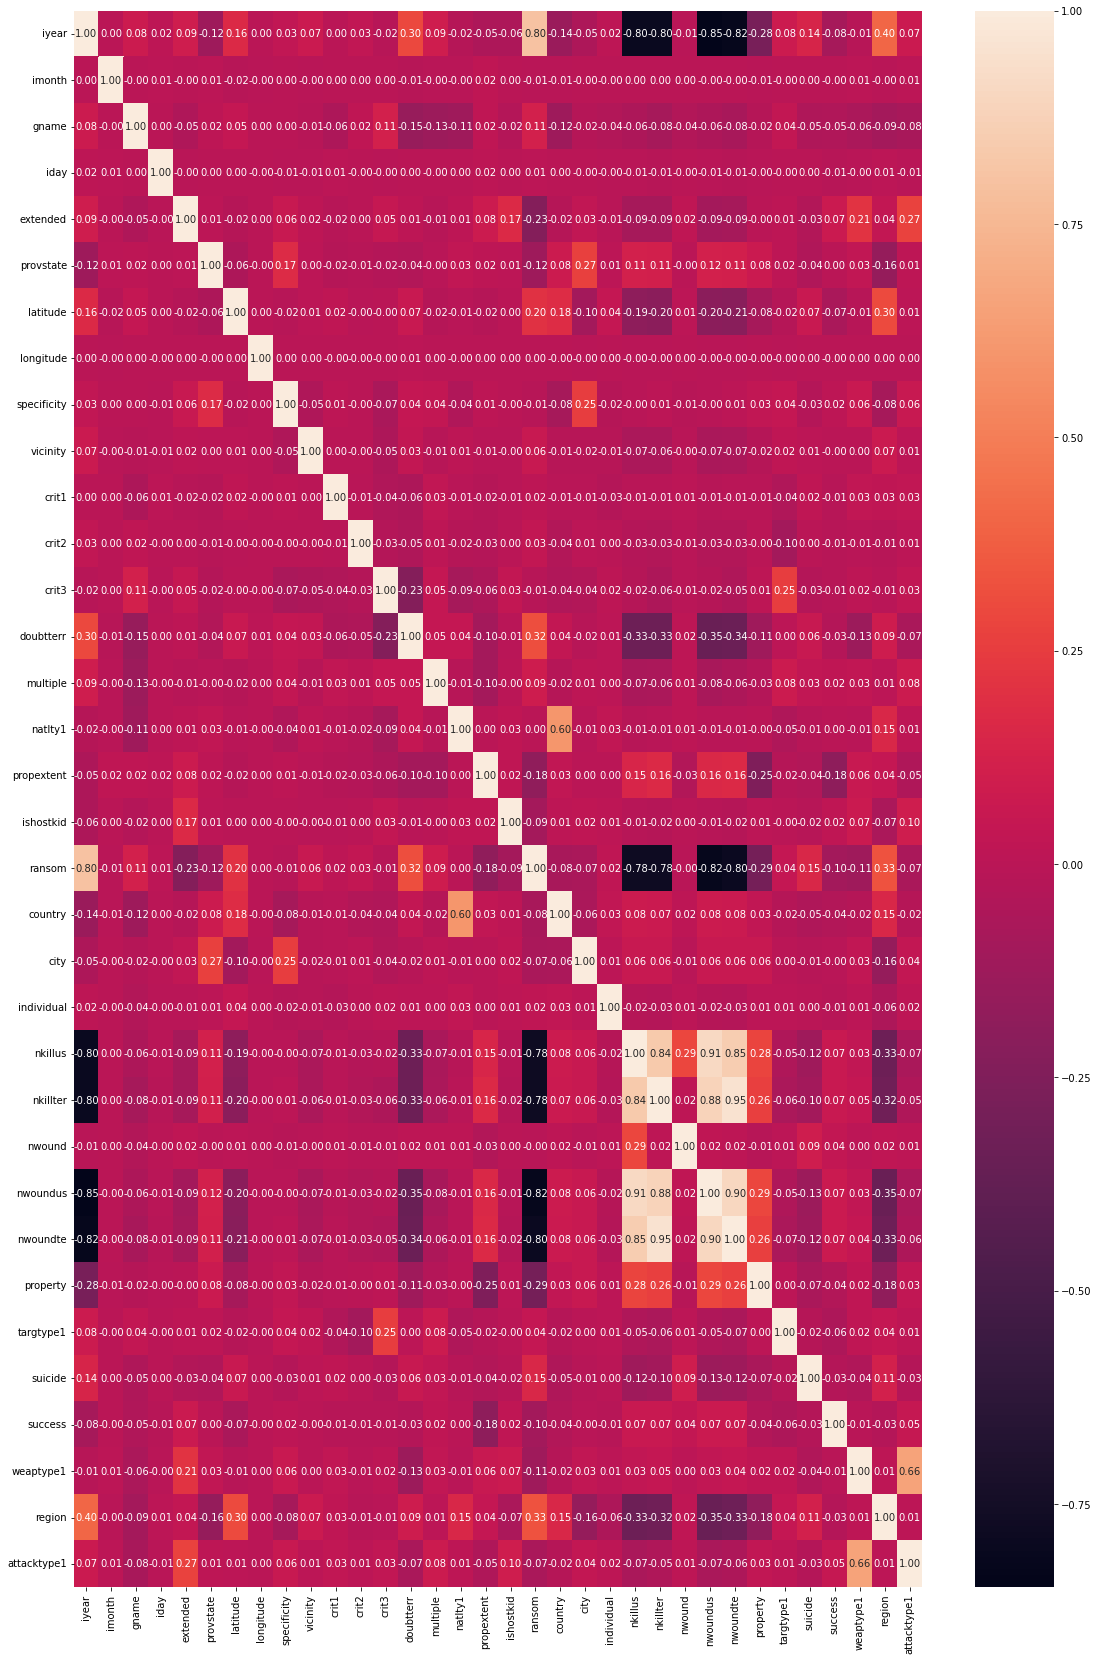

In [ ]:
import seaborn as sns

plt.figure(figsize=(19,29))
sns.heatmap(data.corr(), annot=True, fmt='.2f')

In [ ]:
X=data.copy()
X.shape

(181691, 34)

In [ ]:
count_class_0, count_class_1 = data.success.value_counts()
df_class_0 = data[data['success'] == 0]
df_class_1 = data[data['success'] == 1]

In [ ]:
df_class_1_over = df_class_1.sample(count_class_1, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

Taking success column as target value

In [ ]:
X_success= df_test_over[['imonth','gname', 'iday','extended', 'provstate', 'latitude', 'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3', 'doubtterr', 'multiple', 'natlty1',  'propextent', 'ishostkid', 'ransom', 'country',  'city', 'individual', 'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte', 'property', 'targtype1','suicide', 'weaptype1','region','attacktype1']]

y_success= df_test_over[['success']]

Data Modelling

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_success, y_success, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = MinMaxScaler()
y_train = sc_y.fit_transform(y_train)

In [ ]:

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logisreg = LogisticRegression()
logisreg.fit(X_train,y_train.ravel())
logis_reg = logisreg.predict(X_test)
target_names = ['success', 'not success']
print("Accuracy",accuracy_score(y_test,logis_reg),"\n")
print("Confusion Matrix","\n",confusion_matrix(y_test, logis_reg),"\n")
print("Classification Report",classification_report(y_test, logis_reg, target_names=target_names))


Accuracy 0.7183449651046859 

Confusion Matrix 
 [[2846 1117]
 [1143 2918]] 

Classification Report               precision    recall  f1-score   support

     success       0.71      0.72      0.72      3963
 not success       0.72      0.72      0.72      4061

    accuracy                           0.72      8024
   macro avg       0.72      0.72      0.72      8024
weighted avg       0.72      0.72      0.72      8024



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
Dectree = DecisionTreeClassifier()
Dectree.fit(X_train, y_train)
# make predictions
predictions_dt = Dectree.predict((X_test))
print("Accuracy Score",accuracy_score(y_test, predictions_dt),"\n")
print("Confusion Matrix","\n",confusion_matrix(y_test, predictions_dt),"\n")

print("Classification Report",classification_report(y_test, predictions_dt, target_names=target_names))

Accuracy Score 0.8306331006979063 

Confusion Matrix 
 [[3307  656]
 [ 703 3358]] 

Classification Report               precision    recall  f1-score   support

     success       0.82      0.83      0.83      3963
 not success       0.84      0.83      0.83      4061

    accuracy                           0.83      8024
   macro avg       0.83      0.83      0.83      8024
weighted avg       0.83      0.83      0.83      8024



Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=15, random_state=42)
clf.fit(X_train, y_train.ravel())

predictions_rf = clf.predict((X_test))
print("Accuracy Score",accuracy_score(y_test, predictions_rf),"\n")
print("Confusion Matrix","\n",confusion_matrix(y_test, predictions_rf),"\n")
print("Classification Report",classification_report(y_test, predictions_rf, target_names=target_names))

Accuracy Score 0.8799850448654037 

Confusion Matrix 
 [[3486  477]
 [ 486 3575]] 

Classification Report               precision    recall  f1-score   support

     success       0.88      0.88      0.88      3963
 not success       0.88      0.88      0.88      4061

    accuracy                           0.88      8024
   macro avg       0.88      0.88      0.88      8024
weighted avg       0.88      0.88      0.88      8024



Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(X_train, y_train.ravel())
nb_predictions = nb.predict(X_test)
accuracy = nb.score(X_test, y_test)
print("Accuracy",accuracy,"\n")
print("Confusion Matrix","\n",confusion_matrix(y_test, nb_predictions),"\n")
print("Classification Matrix",classification_report(y_test, nb_predictions, target_names=target_names))

Accuracy 0.6192671984047856 

Confusion Matrix 
 [[3592  371]
 [2684 1377]] 

Classification Matrix               precision    recall  f1-score   support

     success       0.57      0.91      0.70      3963
 not success       0.79      0.34      0.47      4061

    accuracy                           0.62      8024
   macro avg       0.68      0.62      0.59      8024
weighted avg       0.68      0.62      0.59      8024



Support Vector Machine

In [ ]:
from sklearn import svm
clf_svm = svm.SVC()
clf_svm.fit(X_train, y_train.ravel())

predictions_svm = clf_svm.predict((X_test))
print("Accuracy Score",accuracy_score(y_test, predictions_svm))

print("Confusion matrix","/n",confusion_matrix(y_test, predictions_svm))

print("Classification Report","/n",classification_report(y_test, predictions_svm, target_names=target_names))

Accuracy Score 0.7664506480558325
Confusion matrix /n [[3163  800]
 [1074 2987]]
Classification Report /n               precision    recall  f1-score   support

     success       0.75      0.80      0.77      3963
 not success       0.79      0.74      0.76      4061

    accuracy                           0.77      8024
   macro avg       0.77      0.77      0.77      8024
weighted avg       0.77      0.77      0.77      8024



XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
XGB_clf = XGBClassifier()
XGB_clf.fit(X_train, y_train.ravel())
predictions_XGB  = XGB_clf.predict(X_test)
print("Accuracy Score",accuracy_score(y_test, predictions_XGB),"\n")
print("Confusion Matrix","\n",confusion_matrix(y_test,predictions_XGB),"\n")
print("Classification Report",classification_report(y_test,predictions_XGB,target_names = target_names))

Accuracy Score 0.8455882352941176 

Confusion Matrix 
 [[3403  560]
 [ 679 3382]] 

Classification Report               precision    recall  f1-score   support

     success       0.83      0.86      0.85      3963
 not success       0.86      0.83      0.85      4061

    accuracy                           0.85      8024
   macro avg       0.85      0.85      0.85      8024
weighted avg       0.85      0.85      0.85      8024



K Nearest Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KN_clf = KNeighborsClassifier()
KN_clf.fit(X_train,y_train.ravel())
predictions_KN = KN_clf.predict(X_test)
print("Accuracy Score",accuracy_score(y_test,predictions_KN),"\n")
print("Confusion Matrix","\n",confusion_matrix(y_test,predictions_KN),"\n")
print("Classification Report",classification_report(y_test,predictions_KN,target_names = target_names))

Accuracy Score 0.7461365902293121 

Confusion Matrix 
 [[2937 1026]
 [1011 3050]] 

Classification Report               precision    recall  f1-score   support

     success       0.74      0.74      0.74      3963
 not success       0.75      0.75      0.75      4061

    accuracy                           0.75      8024
   macro avg       0.75      0.75      0.75      8024
weighted avg       0.75      0.75      0.75      8024



OnevsRest Classifier

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
OneRest_clf = OneVsRestClassifier(SVC())
OneRest_clf.fit(X_train,y_train)
predictions_OR = OneRest_clf.predict(X_test)
print("Accuaracy Score",accuracy_score(y_test,predictions_OR),"\n")
print("Confusion Matrix","\n",confusion_matrix(y_test,predictions_OR),"\n")
print("Classification Report",classification_report(y_test,predictions_OR,target_names = target_names))

Accuaracy Score 0.7664506480558325 

Confusion Matrix 
 [[3163  800]
 [1074 2987]] 

Classification Report               precision    recall  f1-score   support

     success       0.75      0.80      0.77      3963
 not success       0.79      0.74      0.76      4061

    accuracy                           0.77      8024
   macro avg       0.77      0.77      0.77      8024
weighted avg       0.77      0.77      0.77      8024

